In [1]:
import numpy as np
from collections import Counter
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Add, Dense, Input
from keras.models import Model
import random

import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam

Using TensorFlow backend.


In [0]:
INPUT_DIM=100
NO_TRAIN_SAMPLES=3000

In [3]:
np.arange(-INPUT_DIM/2,INPUT_DIM/2)

array([-50., -49., -48., -47., -46., -45., -44., -43., -42., -41., -40.,
       -39., -38., -37., -36., -35., -34., -33., -32., -31., -30., -29.,
       -28., -27., -26., -25., -24., -23., -22., -21., -20., -19., -18.,
       -17., -16., -15., -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,
        -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,
         5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,
        16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,
        27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,
        38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,
        49.])

In [0]:
randomangles=np.random.uniform(0.1,6.28318,NO_TRAIN_SAMPLES)

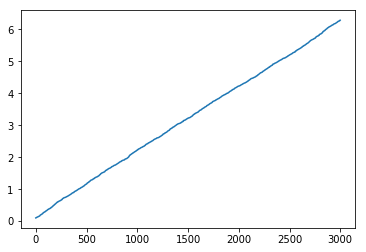

In [5]:
plt.plot(sorted(randomangles))

In [0]:
def create_sample(angle):
  #print(angle)
  y=np.ones((INPUT_DIM))
  x=np.arange(-INPUT_DIM/2,INPUT_DIM/2)
  for _,i in enumerate(x):
    y[int(i)]=np.tan(angle)*(x[int(i)])
  return y

def plot_lines(data):
  x=np.arange(-INPUT_DIM/2,INPUT_DIM/2)
  for y in data:
    plt.plot(y,x)
  axes = plt.gca()
  axes.set_xlim([-INPUT_DIM/2,INPUT_DIM/2])
  axes.set_ylim([-INPUT_DIM/2,INPUT_DIM/2])
  plt.show()

In [0]:
DATA=np.array([create_sample(angle) for angle in randomangles])

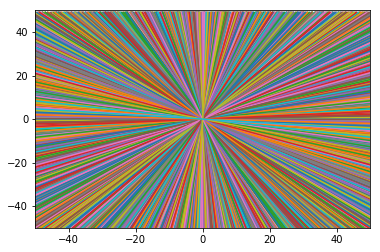

In [8]:
plot_lines(DATA)

In [9]:
DATA.shape

(3000, 100)

In [0]:
INP_NOISE_SHAPE=10
def generator():
  i=Input(shape=(INP_NOISE_SHAPE,))
  d1=Dense(30,activation="tanh")(i)
  d2=Dense(70,activation="tanh")(d1)
  o=Dense(100,activation="linear")(d2)
  model=Model(inputs=i,outputs=o)
  model.compile(loss='binary_crossentropy', optimizer="adam")############### FAKE????
  return model

In [11]:
gen=generator()
gen.summary()##### WE WiLL NVER ACTUALLY DO gen.fit

W0621 23:10:24.458811 139825085474688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0621 23:10:24.504658 139825085474688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0621 23:10:24.514302 139825085474688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0621 23:10:24.557071 139825085474688 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0621 23:10:24.579070 139825085474688 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 70)                2170      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               7100      
Total params: 9,600
Trainable params: 9,600
Non-trainable params: 0
_________________________________________________________________


In [0]:
def discriminator():
  i=Input(shape=(INPUT_DIM,))
  d1=Dense(200,activation="tanh")(i)
  d2=Dense(80,activation="tanh")(d1)
  d3=Dense(20,activation="tanh")(d2)
  o=Dense(1,activation="sigmoid")(d3)
  model=Model(inputs=i,outputs=o)
  model.compile(loss="binary_crossentropy", optimizer='adam',metrics=["acc"])
  return model

In [13]:
disc=discriminator()
disc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_5 (Dense)              (None, 80)                16080     
_________________________________________________________________
dense_6 (Dense)              (None, 20)                1620      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 37,921
Trainable params: 37,921
Non-trainable params: 0
_________________________________________________________________


In [18]:
#create joint model
geninp = Input((INP_NOISE_SHAPE,))
genout = gen(geninp)
discout = disc(genout)
jointmodel = Model(geninp, discout)
jointmodel.compile(loss="binary_crossentropy", optimizer='adam',metrics=["acc"])
jointmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 10)                0         
_________________________________________________________________
model_1 (Model)              (None, 100)               9600      
_________________________________________________________________
model_2 (Model)              (None, 1)                 37921     
Total params: 47,521
Trainable params: 47,521
Non-trainable params: 0
_________________________________________________________________


## Train Discriminator

## Train Generator after 1) joining the models and  2) Discriminator as Frozen and 3) Create Data

In [16]:
disc.evaluate(newdata,newlab)

4000/4000 [==============================] - 0s 51us/step


[0.0056136039830744265, 0.9995]

Train Discriminator
4000/4000 [==============================] - 0s 47us/step
1.0
Train Generator


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train Discriminator
4000/4000 [==============================] - 0s 47us/step
1.0
Train Generator
Train Discriminator
4000/4000 [==============================] - 0s 43us/step
0.76075
Train Generator
Train Discriminator
4000/4000 [==============================] - 0s 46us/step
1.0
Train Generator
Train Discriminator
4000/4000 [==============================] - 0s 45us/step
1.0
Train Generator
Train Discriminator
4000/4000 [==============================] - 0s 43us/step
1.0
Train Generator
Train Discriminator
4000/4000 [==============================] - 0s 46us/step
1.0
Train Generator
Train Discriminator
4000/4000 [==============================] - 0s 47us/step
1.0
Train Generator
Train Discriminator
4000/4000 [==============================] - 0s 43us/step
0.7545
Train Generator
Train Discriminator
4000/4000 [==============================] - 0s 43us/step
0.75225
Train Generator


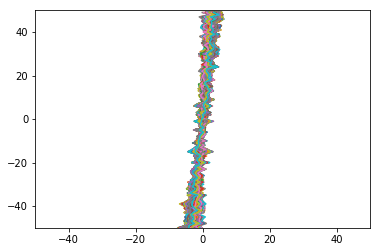

Train Discriminator
4000/4000 [==============================] - 0s 46us/step
1.0
Train Generator
Train Discriminator
4000/4000 [==============================] - 0s 46us/step
0.75325
Train Generator


In [0]:
nepochs=100
while(nepochs>=0):
  # Create Fake Data
  BATCH_SIZE=2000
  input_noise=np.random.randn(BATCH_SIZE,INP_NOISE_SHAPE)
  real=DATA[np.random.choice(DATA.shape[0], BATCH_SIZE, replace=False)]
  fake=gen.predict(input_noise)
  newdata=np.concatenate([real,fake])
  newlab=np.concatenate([np.ones(BATCH_SIZE),np.zeros(BATCH_SIZE)])
  print("Train Discriminator")
  disc.trainable=True
  disc.fit(x=newdata,y=newlab, batch_size=10,epochs=5, verbose=0)
  print(disc.evaluate(newdata,newlab)[1])
  ## Train Generator after 1) joining the models and  2) Discriminator as Frozen and 3) Create Data
  disc.trainable=False
  BATCH_SIZE=2000
  input_noise=np.random.randn(BATCH_SIZE,INP_NOISE_SHAPE)
  fakelab=np.ones(BATCH_SIZE)########NOTE NOW IT IS ONES
  print("Train Generator")
  jointmodel.fit(x=input_noise,y=fakelab,batch_size=10,epochs=5,verbose=0)
  nepochs=nepochs-1
  if nepochs%10==0:
    input_noise=np.random.randn(1000,INP_NOISE_SHAPE)
    fake=gen.predict(input_noise)
    plot_lines(fake)



In [0]:
input_noise=np.random.randn(1000,INP_NOISE_SHAPE)
fake=gen.predict(input_noise)

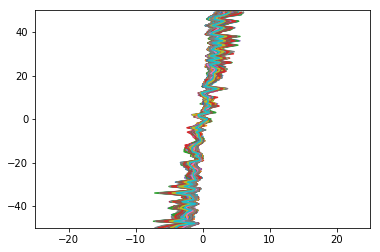

In [220]:
plot_lines(fake)

In [0]:

def plot_lines(data):
  x=np.arange(-INPUT_DIM/2,INPUT_DIM/2)
  for y in data:
    plt.plot(y,x)
  axes = plt.gca()
  axes.set_xlim([-INPUT_DIM/4,INPUT_DIM/4])
  axes.set_ylim([-INPUT_DIM/2,INPUT_DIM/2])
  plt.show()